# Barcode Preprocessing & Detection

### Acknowledgement: Code was referred from <a href='https://pyimagesearch.com/2014/11/24/detecting-barcodes-images-python-opencv/'>here </a> and experimented for optimal result. Credits to pyimagesearch.com.

In [329]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ipcv import image_processor as ip
from importlib import reload

reload(ip)

<module 'ipcv.image_processor' from '/Users/everhett/Projects/python-ws/qr-scanner/ipcv/image_processor.py'>

In [330]:
# Necessary function for comparing visuals.
def display_gray_side_by_side(a, b, title_a, title_b):
    plt.figure(figsize=(14, 12))
    plt.subplot(1, 2, 1)  # 2 rows, 2 columns, first position
    plt.imshow(a, cmap='gray')
    plt.title(title_a)

    plt.subplot(1, 2, 2)  # 2 rows, 2 columns, first position
    plt.imshow(b, cmap='gray')
    plt.title(title_b)

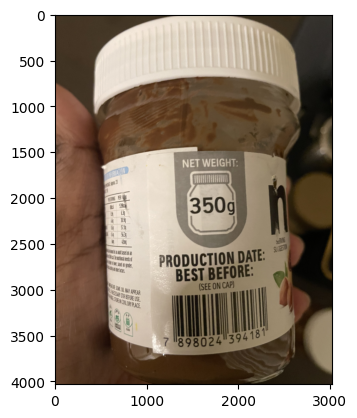

In [331]:
# Load the image as RGB.
# image = ip.load_image('resources/barcode/barcode10.png')
image = ip.load_image('resources/barcode/barcode330.JPG')
plt.imshow(image, cmap='gray')

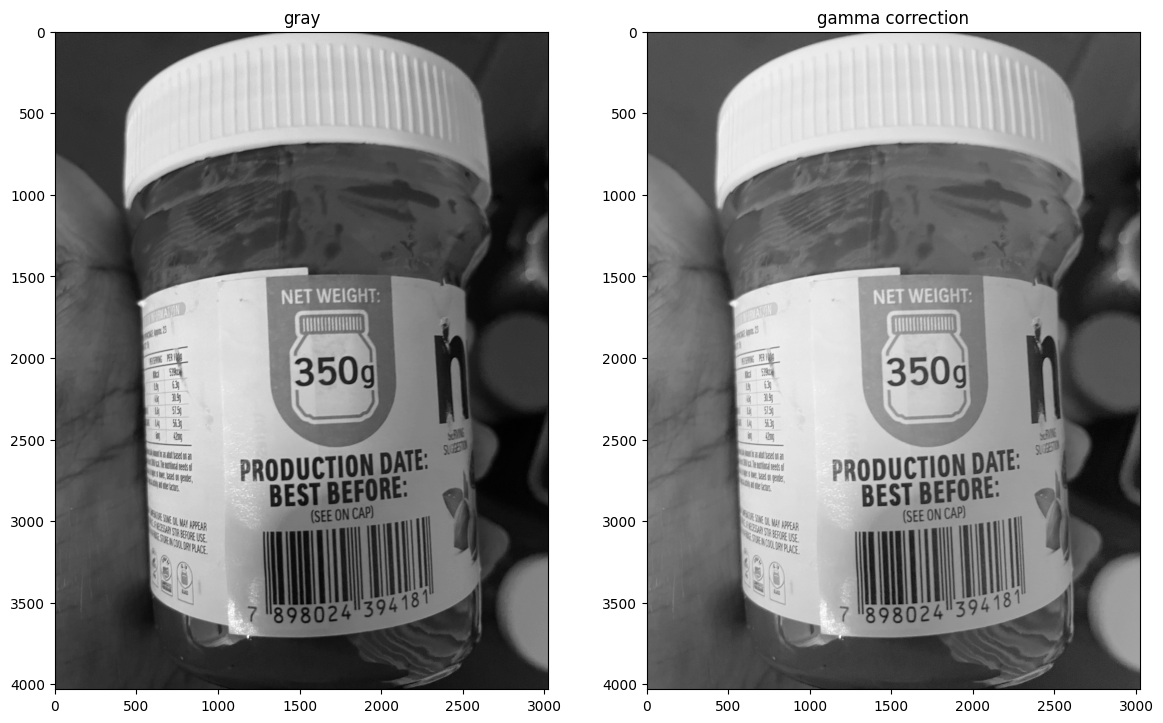

In [332]:
# Dictionary to store previous result.
prev = {}

# Convert the image into gray for processing.
gray = ip.convert_rgb2gray(image)

# Set previous-data for next operation after current execution.
prev['a'] = gray
prev['a_operation'] = 'gray'

gamma = 0.7
b_operation = 'gamma correction'
# Correct image's contrast before removing noises.
b = ip.adjust_gamma(prev['a'], gamma)
display_gray_side_by_side(prev['a'], b, prev['a_operation'], b_operation)

# Set previous-data for next operation after current execution.
prev['a'] = b
prev['a_operation'] = b_operation

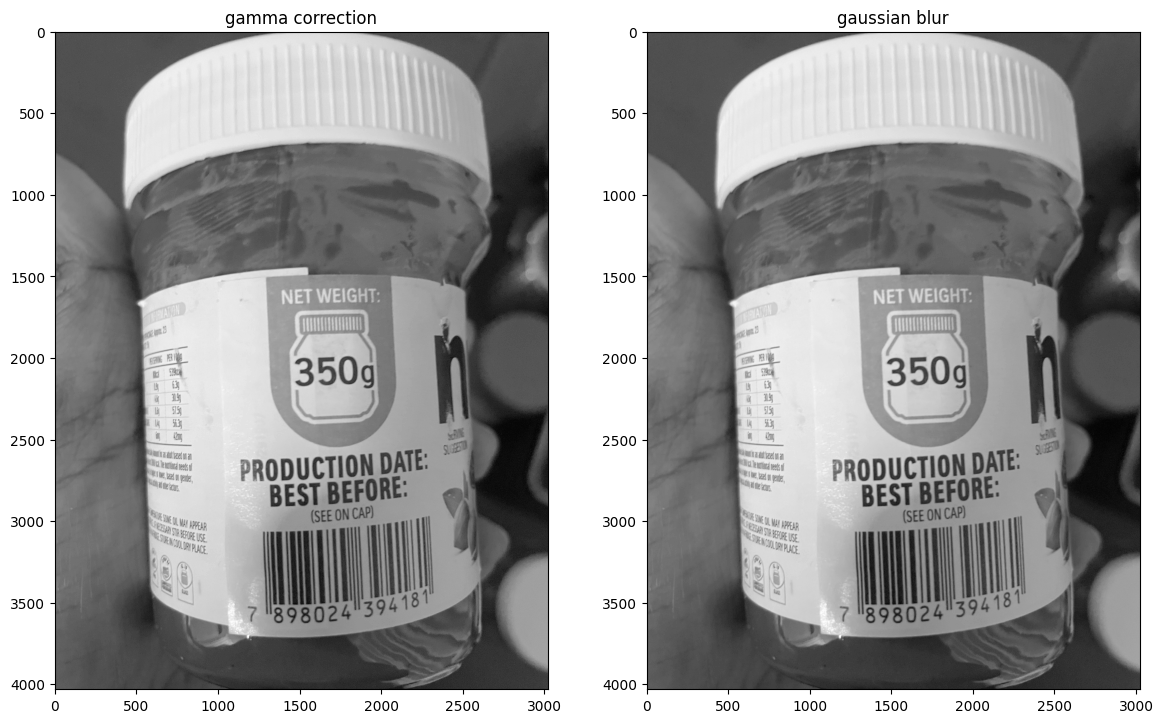

In [333]:
# Lighter Gaussian blur to removes noise before processing.
b_operation = 'gaussian blur'
ksize = (15, 15)
sigma = 1
b = ip.gaussian_blur(prev['a'], ksize, sigma)
display_gray_side_by_side(prev['a'], b, prev['a_operation'], b_operation)

# Set previous-data for next operation after current execution.
prev['a'] = b
prev['a_operation'] = b_operation

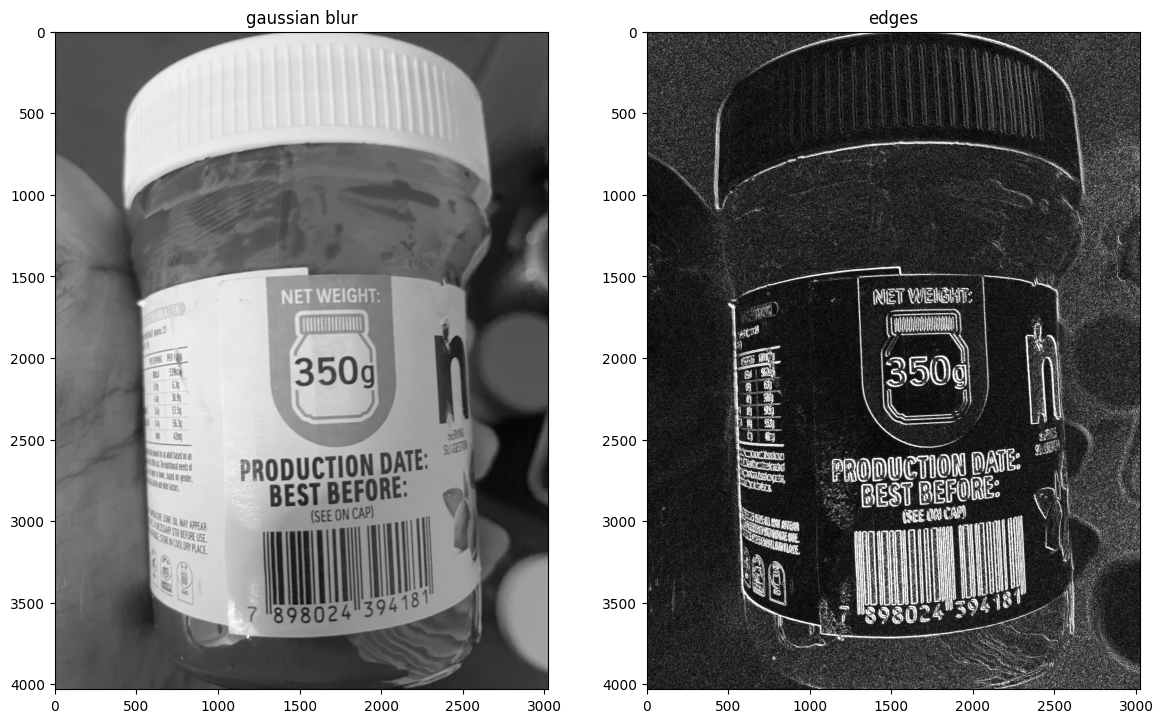

In [334]:
# Detect edges for processing.
b_operation = 'edges'
b = ip.detect_gradient(prev['a'])
display_gray_side_by_side(prev['a'], b, prev['a_operation'], b_operation)

# Set previous-data for next operation after current execution.
prev['a'] = b
prev['a_operation'] = b_operation

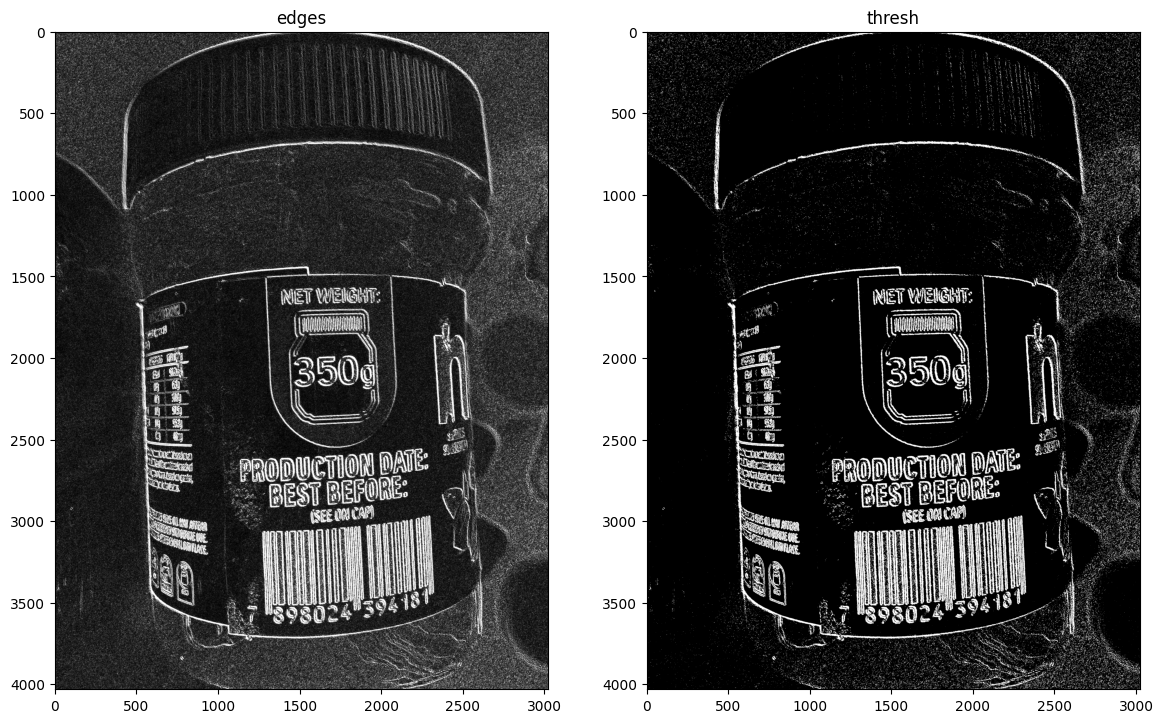

In [335]:
b_operation = 'thresh'
thresh = 128
b = ip.binarize(prev['a'] , thresh)
display_gray_side_by_side(prev['a'], b, prev['a_operation'], b_operation)

# Set previous-data for next operation after current execution.
prev['a'] = b
prev['a_operation'] = b_operation

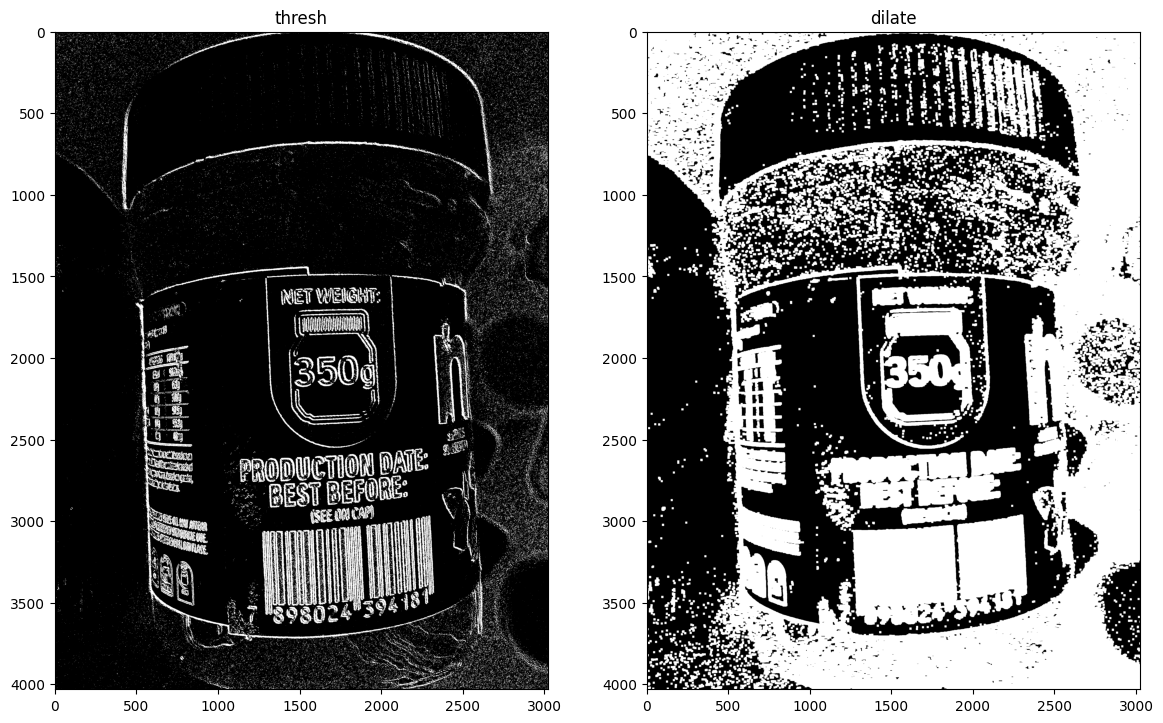

In [336]:
b_operation = 'dilate'
b = ip.dilate(prev['a'], [21, 7], 6)
display_gray_side_by_side(prev['a'], b, prev['a_operation'], b_operation)

# # Set previous-data for next operation after current execution.
# prev['a'] = b
# prev['a_operation'] = b_operation

In [337]:
# # Performs mean blurring on the smoothed image to obtain high-boost enhancement.
# a = b
# ksize = (151, 151)
# sigma = 25
# b = ip.average_blur(a, (59, 59))
# # b = ip.gaussian_blur(a, ksize, sigma)
# display_gray_side_by_side(a, b, 'edges', 'blurred')

In [338]:
# # Detect edges for processing.
# a = b
# b = ip.detect_gradient(a)
# display_gray_side_by_side(a, b, 'gaussian blurred', 'edges')

In [339]:
# a = b
# thresh = 100
# b = ip.binarize(a, thresh)
# display_gray_side_by_side(a, b, 'edges', 'binary')

In [340]:
# a = b
# morphed = ip.dilate(a, [21, 7], 4)
# display_gray_side_by_side(a, b, 'binary', 'dilated')

In [341]:
# x = a
# a = b
# # Shrink
# new_width = int(x.shape[1] / 6)
# new_height = int(x.shape[0] / 6)
#
# b = ip.resize_image(a, new_width, new_height)
# display_gray_side_by_side(a, b, 'dilated', 'resized')

In [342]:
# a = b
# b = ip.resize_image(a, x.shape[1], x.shape[0])
# display_gray_side_by_side(a, b, 'resized', 'enlarged')

In [343]:
# # find the contours in the thresholded image, then sort the contours by their area, keeping only the largest one
# contours, hierarchy = cv2.findContours(b.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# c = sorted(contours, key=cv2.contourArea, reverse=True)[0]
# # compute the rotated bounding box of the largest contour
# rect = cv2.minAreaRect(c)
# box = np.intp(cv2.boxPoints(rect))
# # draw a bounding box rounded the detected barcode and display the image
# cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
# print(f'contour len: {len(contours)}')
# print(f'contour len: {len(c)}')

In [344]:
# plt.imshow(image)

In [345]:
# # plt.imshow(box)
# [X, Y, W, H] = cv2.boundingRect(box)
# cropped = image[Y:Y + H, X:X + W]
# plt.imshow(cropped)